## Entregable Final

### David Martínez Castro A01197437

#### Se procede a descargar todas las librerias necesarias para empezar a trabjar con la base de datos.

In [1]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

In [3]:
%ls

00_00_binder.ipynb                  README.md         StudentsPerformance.csv
07_02_pie_box_scatter_bubble.ipynb  requierementsEXL  Untitled.ipynb
Canada.xlsx                         requirements.txt  welcome_binder.ipynb
datasets/                           runtime.txt
nhanes_2015_2016.csv                session_01/


In [4]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Descripción de la base de datos
### En esta base de datos se encuentra informacion de los resultados para 3 examenes: matematicas, escritura y lectura.

### Variables de la base de datos:
`gender`: Una variable categorica,define si el estudiante es hombre o mujer

`race/ethnicity`: Una variable categorica, define el grupo de etnicidad al que pertenece el alumno,Grupos A,B,C,D.

`parental level of education`: Una variable categorica, compuesta por: Univeridad, Maestria, sin educacion y preparatoria

`lunch`: Conjunto de datos clasificados como texto, definen el tipo de desayuno que se tuvo: el desayuno estandard o el reducido.

`test preparation course`: Varibale categorica, que define si se tuvo o no preparacion para el examen.

`math score`: Una variable numerica, la cual define la calificación que obtuvo el alumno en el examen de matematicas.

`reading score`: Una variable numerica, la cual define la calificación que obtuvo el alumno en el examen de lectura.

`writing score`: Una variable numerica, la cual define la calificación que obtuvo el alumno en el examen de lectura.

## Pregunta de investigación 1

### ¿Cuales son las calificaciones promedio en base al grupo etnico?

In [6]:
pivot = pd.pivot_table(df,
                          index = 'race/ethnicity',
                          values = ['math score','reading score','writing score'],
                          aggfunc ='mean'
                      )
pivot

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


### Observaciones:
#### Se observa que el grupo etnico que cuenta con un mayor promedio en todos los examenes es el grupo E, por otra parte se observa que el grupo A tiene el menor promedio en todos los examenes.

## Pregunta de investigación 2

### ¿Cual es la diferencia entre los alumnos que si tuvieron preparación y los que no tuvieron?

In [9]:
pivot = pd.pivot_table(df,
                          index = 'test preparation course',
                          values = ['math score','reading score','writing score'],
                          aggfunc ='mean'
                      )
pivot

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


### Observaciones:
#### Se observa que los alumnos que tuvieron preparación antes de los examenes obtuvieron un mejor promedio a los que no tuvieron preparación.

## Pregunta de investigación 3

### En el examen de matematicas ¿Quienes obtuvieron mejor calificación los hombres o las mujeres?

<function matplotlib.pyplot.show(*args, **kw)>

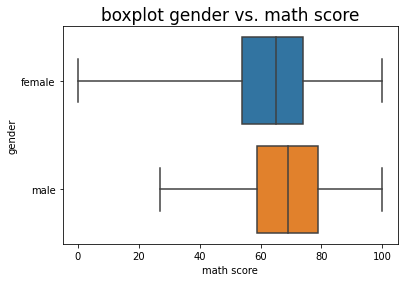

In [13]:
sns.boxplot(x = df['math score'],
            y = df['gender'],
           whis = (0,100) #sirve para quitar outliers
           ).set_title('boxplot gender vs. math score',fontsize =17)
plt.show

### Observaciones:
#### Se observa que en el boxplot de hombres el valor minimo es mayor que en el de la mujer, esto nos indica que los hombres en promedio tuvieron una mejor calificacion.

## Pregunta de investigación 4

### ¿Como fueron los resultados para el exemn de lectura?

Text(0.5, 1.0, 'histograma de reading score')

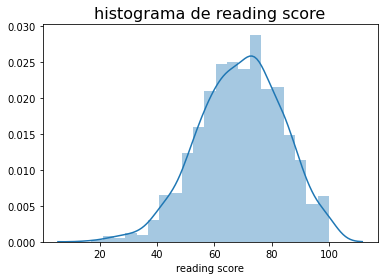

In [27]:
sns.distplot(df['reading score'],
            ).set_title('histograma de reading score', fontsize = 16)

### Observaciones:
#### Para el examen de lectura, se observa que se tuvo un pico para dentro del rango 70-80 lo que indica que una gran mayoria obtuvieron una calificacion dentro de ese rango.

## Pregunta de investigación 5
### ¿La alimentacion afecta en el desempeño de los alumnos?

<function matplotlib.pyplot.show(*args, **kw)>

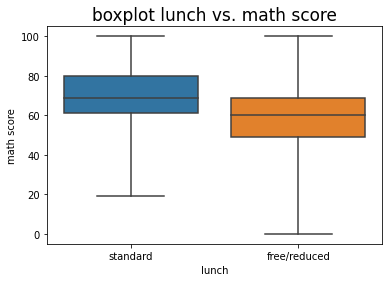

In [40]:
sns.boxplot(x = df['lunch'],
            y = df['math score'],
           whis = (0,100)
           ).set_title('boxplot lunch vs. math score',fontsize =17)
plt.show

### Observaciones: 
#### Se observa que los alumnos que tuvieron lunch antes del examen, tuvieron un mejor promedio a los que alumnos que no tuvieron.

## Pregunta de investigación 6
### ¿Cual seria la correlación entre las variables de la base de datos?

In [45]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


### Observaciones:
#### Al analizar la tabla de correlación se puede ver los resultados de las correlaciones de las 3 variables:
1. reading score y math score tiene una correlacion positiva de 0.817580
2. writing score y math score tiene una correlacion positiva de 0.802642
3. writing score y reading score tiene una correlacion positiva de 0.954598

## Pregunta de investigación 7
### ¿Cuales son las calificaciones mas altas y las mas bajas para los 3 examenes?

In [47]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Observaciones:
#### Se observan los siguientes resultados
math score:  la calificacion maxima es de 100 y la calificacion minima es de 0, con un promedio de: 66.08900

reading score: la calificacion maxima es de 100 y la calificacion minima es de 17, con un promedio de: 69.1690

writing score: la calfiicacion maxima es de 100 y la calificacion minim es de 10, con un promedio de: 68.0540

## Pregunta de investigación 8
### ¿En los examenes de matematicas y lectura cual es la distribucion de las calficaciones en base al genero?

Text(0.5, 1.0, 'Scatter plot of math score vs reading score')

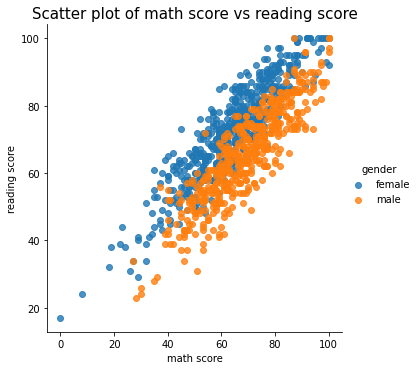

In [54]:
sns.lmplot(x= 'math score',
           y= 'reading score',
           data = df,
           fit_reg = False, 
           hue = 'gender',  
          )
plt.title('Scatter plot of math score vs reading score', fontsize = 15)

### Observaciones:
#### Se obsera que para estos dos examenes ambos generos tuvieron un desempeño similair, sin embargo se observa que para los hombres existe una mayor concentracion en las calificaciones mas altas.

In [129]:
pivot2 = pd.pivot_table(df,
                          index = ['test preparation course'],
                          values = ['math score','reading score','writing score'],
                          aggfunc ='mean'
                      )
pivot2

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [130]:
pivot2['%'] = (pivot2.iloc[:,0]/pivot2.iloc[:,0].sum(axis=0))*100
pivot2

,math score,reading score,writing score,%
test preparation course,,,,
completed,69.695531,73.893855,74.418994,52.099688
none,64.077882,66.534268,64.504673,47.900312


<function matplotlib.pyplot.show(*args, **kw)>

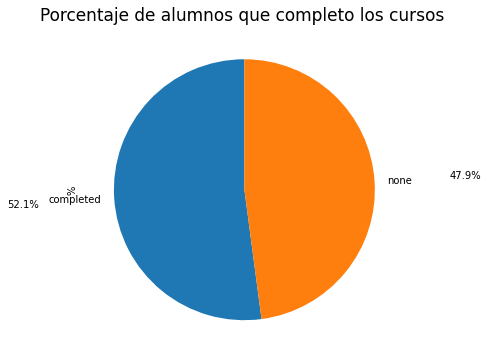

In [133]:
explode_list=[0.06,0.04,0.02,0.04]
color_list = ['coral','skyblue']
pivot2['%'].plot(kind = 'pie',
                   figsize = (16,6),
                   startangle=90,  
                  autopct = '%1.1f%%',
                   pctdistance  =1.7,
                )
          
plt.title('Porcentaje de alumnos que completo los cursos ',fontsize =17)
plt.show

### Observaciones:
#### Se observa que la mitad de los alumnos si realizo una preparación, sin embargo un 47.9% no lo realizo. Esto nos puede indicar que hace falta reforzar con cursos de preparacion para que los alumnos esten preparados para su examen.